| Name | Student Number |
| ---- | -------------- |
| Sam Lamboo | S2653346 |


# Exercise 7: Global warming in the Netherlands?

The Dutch KNMI organization measures, among others, the temperature in the Netherlands. Complete datasets of recorded temperatures are available via https://www.knmi.nl/nederland-nu/klimatologie-metingen-en-waarnemingen . Of particular interest for this exercise in the 'average' temperature per month since 1906 corrected for changes in the location of stations and methods of measurement. See http://www.knmi.nl/kennis-en-datacentrum/achtergrond/centraal-nederland-temperatuur-cnt for more background information on these measurements. 

The data can be used as input for climate models and is available online as https://climexp.knmi.nl/data/tcnt_v11.dat 
Inside the datafile you find a reference:  G. van der Schrier, A. van Ulden, and G. J. van Oldenborgh, Clim. Past, 7, 527-542, 2011, https://doi.org/10.5194/cp-7-527-201 

A more detailed analysis can be done by getting data per day via https://www.knmi.nl/nederland-nu/klimatologie/daggegevens . For instance station 260 in De Bilt has a time series starting at 1906. Pandas can directly read the data from a zip file. In this case you need to convert the timestamp to a proper x-axis.

In this exercise we will use the advanced pandas library to handle the data. The fastest way to deal with this library is via the cookbook https://pandas.pydata.org/pandas-docs/stable/cookbook.html

It is not necessary to download the datafile it can be read directly from the internet using the pandas read_csv fucntion.

In [1]:
import numpy as np
import pandas as pd

In [2]:
# The file will with data has gone offline and changed format and location over time. This is the old file - I have a local copy.

# header=pd.read_csv('https://cdn.knmi.nl/knmi/asc/klimatologie/onderzoeksgegevens/CNT/tg_CNT.txt', 
#                   skiprows=11, delimiter='\s+')
# header.columns=header.columns.str.strip(',') #remove the strange comma from the column names
# print(header.columns)

# Keep this code for reference - it may come in handy, but is obsolete for the moment.

In [3]:
# The new header does not contain column names. 
column_names = ['YEAR', 'Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep',
       'Oct', 'Nov', 'Dec']
       
df=pd.read_csv('https://climexp.knmi.nl/data/tcnt_v11.dat', skiprows=7, delimiter='\s+', header=None)
# Below is a backup of the file from February 2025 that is available via github 
# df=pd.read_csv('https://mdedood.github.io/RS-BP/python/tcnt_v11.dat', skiprows=8, delimiter='\s+', header=None) 
df.columns=column_names # This overwrites the column names with something that makes sense
df.head()

,YEAR,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec
0,1906,3.29,2.28,3.79,7.67,12.41,14.17,16.79,17.00,13.35,11.65,7.50,-0.28
1,1907,1.48,0.41,4.60,7.43,12.49,13.52,13.90,15.55,13.79,11.24,5.58,3.09
2,1908,-1.25,3.29,3.44,5.89,12.98,16.22,16.65,15.08,13.43,9.78,4.23,0.97
3,1909,0.54,0.30,2.97,8.55,11.30,12.94,14.58,16.31,13.02,10.95,3.89,3.01
4,1910,3.26,4.03,5.26,7.84,12.43,16.00,15.15,16.22,13.35,10.38,3.31,5.34


## Example: plotting the average temperature for the month January

The dataset starts at 1906 and you can easily plot this data by calling the appropriate column from the pandas dataframe. I called the dataframe 'df' and call the data for the x-axis as 'df['YEAR']' and the y-column as 'df['Jan']' to create a plot of the average temperature for the month January from 1906 until now.

In [4]:
# plot settings 

import matplotlib.pyplot as plt
%matplotlib inline 

# Some default styling for the figures; best solution is once at the beginning of the code
# See https://matplotlib.org/3.1.3/tutorials/introductory/customizing.html
# These settings assume that you have used import matplotlib.pyplot as plt 

# Smallest font size is a 10 point font for a 4 inch wide figure. 
# font sizes and figure size are scaled by a factor 2 to have a large figure on the screen

SMALL_SIZE = 10*np.sqrt(2)
MEDIUM_SIZE = 12*np.sqrt(2)
BIGGER_SIZE = 14*np.sqrt(2)

plt.rc('font', size=SMALL_SIZE, family='serif')          # controls default text sizes
plt.rc('text', usetex=True)                              # use LaTeX for all text
plt.rc('axes', titlesize=SMALL_SIZE)                     # fontsize of the axes title
plt.rc('axes', labelsize=MEDIUM_SIZE)                    # fontsize of the x and y labels
plt.rc('xtick', labelsize=SMALL_SIZE, direction='in')    # fontsize of the tick labels
plt.rc('ytick', labelsize=SMALL_SIZE, direction='in')    # fontsize of the tick labels
plt.rc('legend', fontsize=SMALL_SIZE)                    # legend fontsize
plt.rc('figure', titlesize=BIGGER_SIZE)                  # fontsize of the figure title
plt.rc('figure', figsize='8, 6')                         # size of the figure, used to be '4, 3' in inches

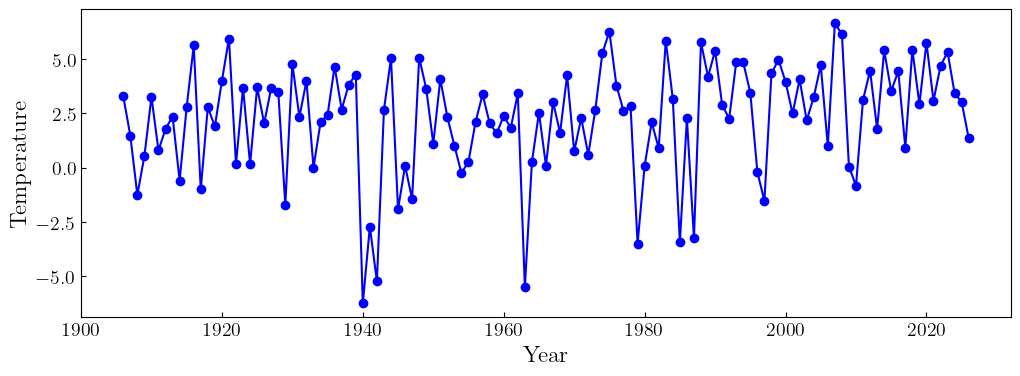

In [5]:
plt.figure(figsize=(12,4))
plt.plot(df['YEAR'], df['Jan'], ls='solid', marker='o', color='blue')
plt.xlabel('Year') # Axes have labels!
plt.ylabel('Temperature')
plt.show()

### Inspect the data first
*The last row in the datafile is incomplete and may cause trouble. The entries for the future are not a number 'NaN' (see below) and I hope (but did not check) that these are ignored when calculating an average. This happens unless you run this notebook in January.*

This issue can be avoided by dropping a row of data. using a command like: 

df=df.drop(112) # drop row 112

or 

df=df[:-1] # drop the last row 

You should to inspect the end of the data using the df.tail() command. (df.head() checks the top of the file). After dropping a column it is advised to check the new dataframe, i.e. use 

df.tail()

In [6]:
df.tail()

,YEAR,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec
116,2022,4.697312,6.417477,7.223656,9.233333,14.56398,17.44000,18.88280,20.62473,14.68389,13.30215,8.598889,3.819893
117,2023,5.323656,5.383646,6.987634,8.659444,13.71452,19.88944,18.31505,17.74839,17.87278,13.15000,7.435556,6.614516
118,2024,3.426344,8.036781,8.902688,10.823330,15.54516,16.02944,18.36237,19.56452,15.75278,11.95323,6.633333,5.517742
119,2025,3.027957,3.773683,7.032258,11.460560,14.26882,18.58222,19.02419,18.62258,15.16889,11.77312,7.538889,5.711828
120,2026,1.348395,-999.900000,-999.900000,-999.900000,-999.90000,-999.90000,-999.90000,-999.90000,-999.90000,-999.90000,-999.900000,-999.900000


In [7]:
df = df[:-1]  # I drop the last row to get rid of values -999.9
df.tail()

,YEAR,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec
115,2021,3.080645,4.140090,6.355914,6.460556,11.37742,18.71334,18.06667,16.86344,15.85833,11.38548,6.548333,5.207527
116,2022,4.697312,6.417477,7.223656,9.233333,14.56398,17.44000,18.88280,20.62473,14.68389,13.30215,8.598889,3.819893
117,2023,5.323656,5.383646,6.987634,8.659444,13.71452,19.88944,18.31505,17.74839,17.87278,13.15000,7.435556,6.614516
118,2024,3.426344,8.036781,8.902688,10.823330,15.54516,16.02944,18.36237,19.56452,15.75278,11.95323,6.633333,5.517742
119,2025,3.027957,3.773683,7.032258,11.460560,14.26882,18.58222,19.02419,18.62258,15.16889,11.77312,7.538889,5.711828


In [8]:
df.head()

,YEAR,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec
0,1906,3.29,2.28,3.79,7.67,12.41,14.17,16.79,17.00,13.35,11.65,7.50,-0.28
1,1907,1.48,0.41,4.60,7.43,12.49,13.52,13.90,15.55,13.79,11.24,5.58,3.09
2,1908,-1.25,3.29,3.44,5.89,12.98,16.22,16.65,15.08,13.43,9.78,4.23,0.97
3,1909,0.54,0.30,2.97,8.55,11.30,12.94,14.58,16.31,13.02,10.95,3.89,3.01
4,1910,3.26,4.03,5.26,7.84,12.43,16.00,15.15,16.22,13.35,10.38,3.31,5.34


## Checking the monthly temperatures

### a) Combine the data to obtain the average temperature and standard deviation for each month over the period 1906-now

In [9]:
averages = df.mean(axis=0) # calculate the average for each month
std = df.std(axis=0) # calculate the standard deviation for each month
print(averages, "\n", std)

YEAR    1965.500000
Jan        2.286615
Feb        2.734516
Mar        5.364386
Apr        8.562213
May       12.765747
Jun       15.527926
Jul       17.260247
Aug       17.002076
Sep       14.215625
Oct       10.249195
Nov        5.856204
Dec        3.263188
dtype: float64 
 YEAR    34.785054
Jan      2.557386
Feb      2.724573
Mar      1.779032
Apr      1.621434
May      1.438606
Jun      1.494339
Jul      1.559298
Aug      1.408235
Sep      1.356373
Oct      1.549949
Nov      1.698128
Dec      2.181648
dtype: float64


We can see this also calculates an average year, we can easily get rid of this however. (Note that this is done in a seperate codeblock, as notebooks have the _wonderful_ property of easily losing data.)

In [10]:
averages = averages[1:] # drop the average year.
std = std[1:] # drop the standard deviation of the year.

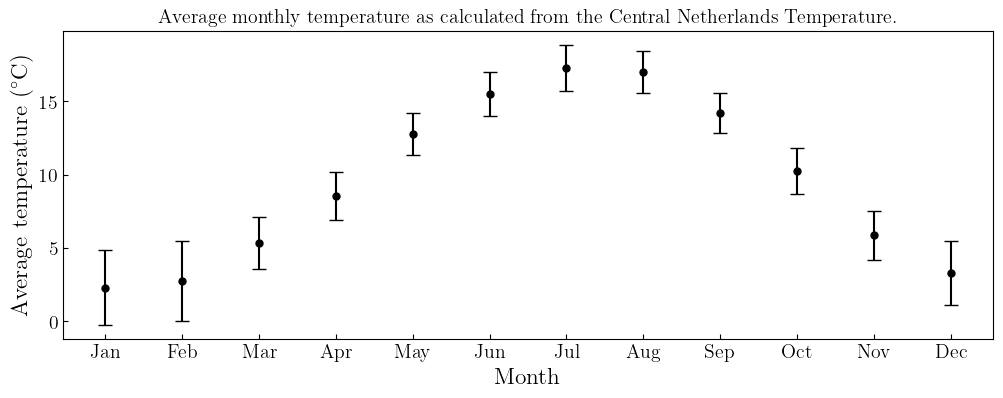

In [11]:
fig, ax = plt.subplots(figsize=(12,4))
ax.errorbar(averages.index, averages.values, yerr=std.values, 
            ls='None', marker='o', color='k', markersize=5, capsize=5)

ax.set_xlabel('Month')
ax.set_ylabel('Average temperature ($^\circ$C)')
ax.set_title('Average monthly temperature as calculated from the Central Netherlands Temperature.')

plt.show()

As the earth revolves around the sun, the distance between earth and sun has a sinusoidal dependence on time due to the inclination of the rotation axis of the earth. 

### b) Construct a model and check if the average temperature per month can be described by a sinusoidal function by fitting the data to such a model. 

In [12]:
def yearsine(month, amplitude, phase, offset):
    return amplitude * np.sin(2*np.pi*month/12 + phase) + offset

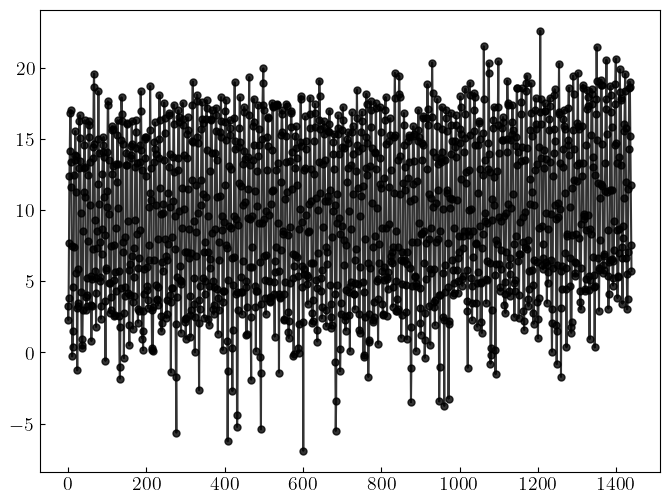

In [13]:
linear_data = df.drop(columns=['YEAR']).to_numpy().reshape(-1) # drop the year column and reshape the data to a 1D array
month = np.arange(0, len(linear_data)) # create an array of month numbers

plt.plot(month, linear_data, ls='solid', marker='o', color='k', markersize=5, 
         alpha=0.8)
# Very quick plot just to check if any weird things stand out in the data. (years making it through for example)

In [14]:
from scipy.optimize import curve_fit

In [15]:
popt, pcov = curve_fit(yearsine, month, linear_data, p0=[10, np.pi, 7])
print(popt)
error = np.sqrt(np.diag(pcov))
print(error)

[7.67325477 4.6173285  9.5906615 ]
[0.06888827 0.00897773 0.04871136]


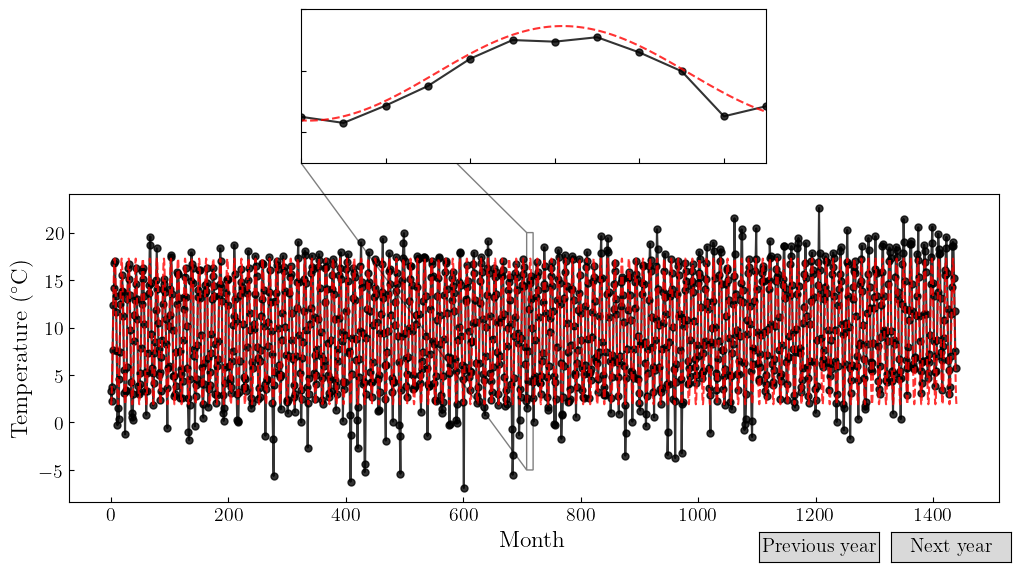

In [16]:
from matplotlib.widgets import Button
%matplotlib inline

fig, ax = plt.subplots(figsize=(12,4))

xx = np.linspace(0, len(linear_data), len(linear_data)*10)

ax.plot(month, linear_data, ls='solid', marker='o', color='k', markersize=5,
        alpha=0.8, label='Data')

ax.plot(xx, yearsine(xx, *popt), ls='dashed', color='red', label='Fit', 
        alpha=0.8)

inset_year = 1965 - 1906 # subtract the startyear

inset = ax.inset_axes(
    [0.25, 1.1, 0.5, 0.5],
    xlim=(12 * inset_year, 12 * inset_year + 11),
    ylim=(-5, 20),
    xticklabels=[],
    yticklabels=[]
)
inset.plot(month, linear_data, ls='solid', marker='o', color='k', markersize=5,
           alpha=0.8, label='Data')
inset.plot(xx, yearsine(xx, *popt), ls='dashed', color='red', label='Fit',
           alpha=0.8)
ax.indicate_inset_zoom(inset, edgecolor='black')

ax.set_xlabel('Month')
ax.set_ylabel('Temperature ($^\circ$C)')

class MoveInset():
        def __init__(self, inset, ax):
            self.inset = inset
            self.ax = ax
            inset_year = 1965 - 1906
        
        def next(self, event):
                self.inset_year += 1
                self.inset.set_xlim(12 * self.inset_year, 
                                    12 * self.inset_year + 11)
                self.ax.indicate_inset_zoom(self.inset, edgecolor='black')
                plt.draw()
        
        def prev(self, event):
                self.inset_year -= 1
                self.inset.set_xlim(12 * self.inset_year, 
                                    12 * self.inset_year + 11)
                self.ax.indicate_inset_zoom(self.inset, edgecolor='black')
                plt.draw()

callback = MoveInset(inset, ax)
axprev = fig.add_axes([0.7, -0.04, 0.1, 0.075])
axnext = fig.add_axes([0.81, -0.04, 0.1, 0.075])
bnext = Button(axnext, 'Next year')
bnext.on_clicked(callback.next)
bprev = Button(axprev, 'Previous year')
bprev.on_clicked(callback.prev)

plt.show()

Sadly buttons don't seem to work in notebooks :(

In [17]:
def chi_squared(observed, expected, error):
    return np.sum((observed - expected)**2 / error**2)

As we don't have any errors on the CNT month data, we will take it to be $1^\circ C$ for ease of calculation.

In [18]:
expected = yearsine(month, *popt)
data_chi2 = chi_squared(linear_data, expected, 1)
print(f'Chi-squared: {data_chi2:.2f}')
data_chi2_per_dof = data_chi2 / (len(linear_data) - len(popt))
print(f'Chi-squared per degree of freedom: {data_chi2_per_dof:.2f}')

Chi-squared: 4909.98
Chi-squared per degree of freedom: 3.42


The $\chi^2$ of the data to this fit is very high, especially considering the fact we are overestimating the error on the weekly data by a potentially quite significant margin.

### c) What is the average temperature $T_{avg}$ in the Netherlands for the period 1906-now? Which month is the coldest month? Which month is the hottest?

In [19]:
average = np.average(linear_data)
standard_deviation = np.std(linear_data)
print(f'Average: {average:.0f} ± {standard_deviation:.0f} °C')

minimum_temp = np.min(linear_data)
coldest_month_index = np.argmin(linear_data)
print(f'Coldest month: {coldest_month_index//12 + 1906}/{coldest_month_index % 12 + 1} with a temperature of {minimum_temp:.2f} °C')

maximum_temp = np.max(linear_data)
warmest_month_index = np.argmax(linear_data)
print(f'Warmest month: {warmest_month_index//12 + 1906}/{warmest_month_index % 12 + 1} with a temperature of {maximum_temp:.2f} °C')

Average: 10 ± 6 °C
Coldest month: 1956/2 with a temperature of -6.90 °C
Warmest month: 2006/7 with a temperature of 22.59 °C


### d) Is the data of KNMI well described by the simple sinusoidal model based on the value of $\chi^2$?

I may or may not have already described that above, but I will repeat those cells.

As we don't have any errors on the CNT month data, we will take it to be $1^\circ C$ for ease of calculation.

In [20]:
expected = yearsine(month, *popt)
data_chi2 = chi_squared(linear_data, expected, 1)
print(f'Chi-squared: {data_chi2:.2f}')
data_chi2_per_dof = data_chi2 / (len(linear_data) - len(popt))
print(f'Chi-squared per degree of freedom: {data_chi2_per_dof:.2f}')

Chi-squared: 4909.98
Chi-squared per degree of freedom: 3.42


The $\chi^2$ of the data to this fit is very high, especially considering the fact we are overestimating the error on the weekly data by a potentially quite significant margin.

## Global warming: analyzing the average temperature in the Netherlands since 1906

A much more heated debate is the issue of global warming. For a more solid scientific basis for the effect I refer to online information http://climate.nasa.gov/. Let’s try to look at local warming using the data from KNMI.

### e) Calculate the average annual temperature by averaging over all 12 months for each year and plot this average annual temperature for the period 1906-now

If all is well you should get some noisy data, showing a gradual, slow increase with time. 

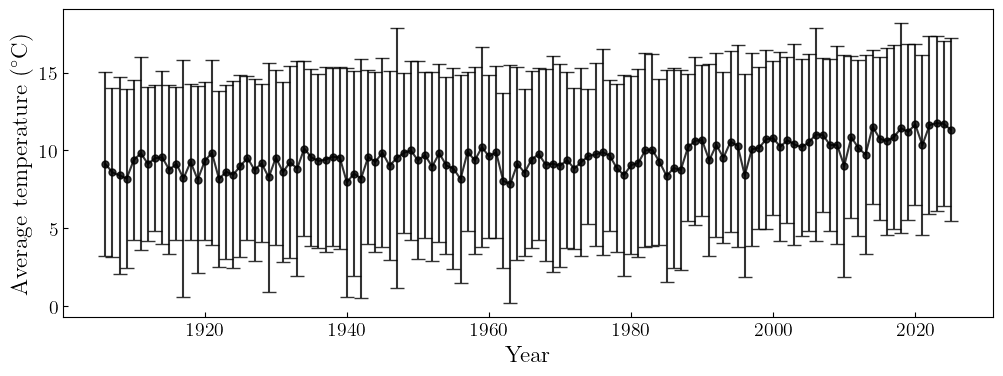

In [21]:
year = df['YEAR']
yearly_average = df.drop(columns=['YEAR']).mean(axis=1)
yearly_std = df.drop(columns=['YEAR']).std(axis=1)

fig, ax = plt.subplots(figsize=(12,4))
ax.errorbar(year, yearly_average, yerr=yearly_std, ls='solid', marker='o', 
            color='k', markersize=5, capsize=5, alpha=0.8)

ax.set_xlabel('Year')
ax.set_ylabel('Average temperature ($^\circ$C)')

plt.show()

Calculating the standard deviation this way is perhaps not the best way of doing it, as we don't really get an error on the value being the true average of that year, but the variance over that year.

### f) Fit the data to a straight line and find the increase in average temperature in the Netherlands for the period 1906-now.

In [22]:
def linear(x, a, b):
    return a * x + b

popt, pcov = curve_fit(linear, year, yearly_average, p0=[0.01, 10])
print(popt)
error = np.sqrt(np.diag(pcov))
print(error)

[ 1.76662687e-02 -2.51323896e+01]
[1.78541732e-03 3.50978271e+00]


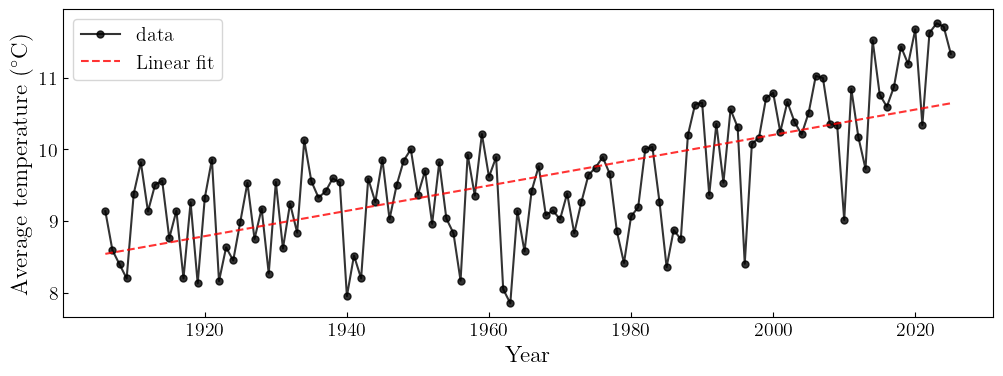

In [23]:
fig, ax = plt.subplots(figsize=(12,4))
ax.plot(year, yearly_average, ls='solid', marker='o', 
            color='k', markersize=5, alpha=0.8, label='data')

ax.plot(year, linear(year, *popt), 
        ls='dashed', color='red', alpha=0.8, label='Linear fit')

ax.set_xlabel('Year')
ax.set_ylabel('Average temperature ($^\circ$C)')
plt.legend()

plt.show()

In [24]:
linear_fit_chi2 = chi_squared(yearly_average, linear(year, *popt), 1)
print(f'Chi-squared for linear fit: {linear_fit_chi2:.2f}')
linear_fit_chi2_per_dof = linear_fit_chi2 / (len(yearly_average) - len(popt))
print(f'Chi-squared per degree of freedom for linear fit: {linear_fit_chi2_per_dof:.2f}')

Chi-squared for linear fit: 54.16
Chi-squared per degree of freedom for linear fit: 0.46


Again assuming the error to be $1^\circ C$.

In [25]:
linear_fit_chi2 = chi_squared(yearly_average, linear(year, *popt), 0.5)
print(f'Chi-squared for linear fit: {linear_fit_chi2:.2f}')
linear_fit_chi2_per_dof = linear_fit_chi2 / (len(yearly_average) - len(popt))
print(f'Chi-squared per degree of freedom for linear fit: {linear_fit_chi2_per_dof:.2f}')

Chi-squared for linear fit: 216.65
Chi-squared per degree of freedom for linear fit: 1.84


We can see however that if the data is more accurate than that (which it likely is) the $\chi^2$ value quickly rises. It is therefore really difficult to say if this model is correct without knowing the correct error on the yearly data. The error is however likely to be quite small, and therefore this is probably not a correct model.

Consider the hypothesis that there is no measurable effect of local warming, assuming that the trend in the data is due to some random statistical fluctuations. 

### g) Test this hypothesis by constructing a model and looking at the goodness of fit.

The model asked is one where there is no measurable effect of local warming. This therefore just means taking an average as a model.

In [26]:
expected = np.average(yearly_average)
print (f'Expected value (average): {expected:.2f} °C')

data_chi2 = chi_squared(yearly_average, expected, 1)
print(f'Chi-squared: {data_chi2:.2f}')
data_chi2_per_dof = data_chi2 / (len(yearly_average) - 1)
print(f'Chi-squared per degree of freedom: {data_chi2_per_dof:.2f}')

Expected value (average): 9.59 °C
Chi-squared: 99.10
Chi-squared per degree of freedom: 0.83


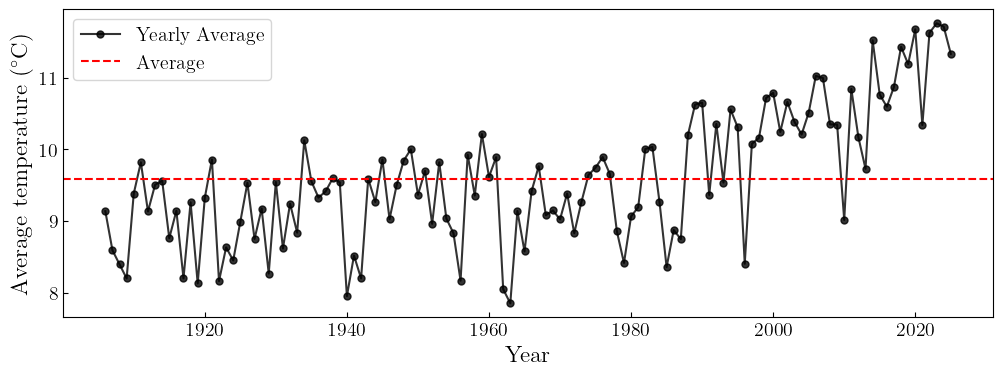

In [27]:
fig, ax = plt.subplots(figsize=(12,4))
ax.plot(year, yearly_average, label='Yearly Average',
        color='k', marker='o', markersize=5, alpha=0.8)
ax.axhline(expected, color='red', ls='dashed', label='Average')
ax.set_xlabel('Year')
ax.set_ylabel('Average temperature ($^\circ$C)')
plt.legend()
plt.show()

This result is less significant than the linear fit at the same margin of error.

In [28]:
expected = np.average(yearly_average)
print (f'Expected value (average): {expected:.2f} °C')

data_chi2 = chi_squared(yearly_average, expected, 0.5)
print(f'Chi-squared: {data_chi2:.2f}')
data_chi2_per_dof = data_chi2 / (len(yearly_average) - 1)
print(f'Chi-squared per degree of freedom: {data_chi2_per_dof:.2f}')

Expected value (average): 9.59 °C
Chi-squared: 396.40
Chi-squared per degree of freedom: 3.33


And the same goes for a larger margin of error on the data. (compared to the linear model with the larger margin of error) (this was to be expected of course)

---

*For a solid scientific discussion on the origin of the trend consider that the effect of greenhouse gasses in the atmosphere https://en.wikipedia.org/wiki/Greenhouse_gas and the fact that the solar activity varies over time https://en.wikipedia.org/wiki/Solar_cycle. Also consider that the average temperature in the Netherlands might be a very poor measure of the global average temperature.*